In [79]:
# impor dataset, name it as df
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [80]:
# Dataset information

# Varible name and date type
for column in df.columns:
  print(f"{column}: {df[column].dtype}")

# Shape
df.shape

brand: object
model: object
model_year: int64
milage: object
fuel_type: object
engine: object
transmission: object
ext_col: object
int_col: object
accident: object
clean_title: object
price: object


(4009, 12)

In [81]:
# Numeric variables
from matplotlib.ticker import MaxNLocator
import re

# "milage"
df['milage'] = df['milage'].str.replace(r'\D', '', regex=True)
df['milage'] = df['milage'].astype(int)

# "price"
df['price'] = df['price'].str.replace(',', '', regex=True)
df['price'] = df['price'].str.replace(r'\$', '', regex=True)
df['price'] = df['price'].astype(int)

df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [82]:
# Check cardinality for all categorical varibles (before input missing values)
categorical_columns = df.select_dtypes(include=['object']).columns
cardinality = {column: df[column].nunique() for column in categorical_columns}
threshold = 0.01 * len(df)
high_cardinality_cols = {col: count for col, count in cardinality.items() if count > threshold}
high_cardinality_cols

{'brand': 57,
 'model': 1898,
 'engine': 1146,
 'transmission': 62,
 'ext_col': 319,
 'int_col': 156}

In [83]:
# Handling missing values
missing_values = df.isnull().sum()
missing_values

# fuel_type
df['fuel_type'] = df['fuel_type'].fillna('Unknown') # treating missing fuel_type entries as "Unknown" maintains the categorical nature

# accident
np.random.seed(170)
df['accident'] = df['accident'].replace({'None reported': 'no'}) # normalized varible
df['accident'] = df['accident'].replace({'At least 1 accident or damage reported': 'yes'})
accident_missing_entry = df['accident'].isnull()
accident_random_choices = np.random.choice(['yes', 'no'], size=accident_missing_entry.sum())
df.loc[accident_missing_entry, 'accident'] = accident_random_choices  # Fill in missing values with random generate value 'yes' or 'no

# clean_title
df['clean_title'] = df['clean_title'].str.lower()
df['clean_title'] = df['clean_title'].replace({'accident or damage reported': 'no'}) # normalized varible
title_missing_entry = df['clean_title'].isnull()
title_random_choices = np.random.choice(['yes', 'no'], size=title_missing_entry.sum())
df.loc[title_missing_entry, 'clean_title'] = title_random_choices  # Fill in missing values with random generate value 'yes' or 'no
df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,yes,yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,yes,yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,no,yes,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,no,yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,no,yes,34999


In [84]:
# Check for missing value again
missing_values = df.isnull().sum()
missing_values

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [85]:
# Check cardinality (after handling missing values)
categorical_columns = df.select_dtypes(include=['object']).columns
cardinality = {column: df[column].nunique() for column in categorical_columns}
threshold = 0.01 * len(df)
high_cardinality_cols = {col: count for col, count in cardinality.items() if count > threshold}
high_cardinality_cols
# still the same variables that have high cardinality, handled missing values did not impact this

{'brand': 57,
 'model': 1898,
 'engine': 1146,
 'transmission': 62,
 'ext_col': 319,
 'int_col': 156}

In [86]:
# Remove high cadinality features (but keep brand, it's the important factor for car price in real life)
columns = ['model', 'engine', 'transmission', 'ext_col', 'int_col']
df = df.drop(columns, axis=1)
df.head()

,brand,model_year,milage,fuel_type,accident,clean_title,price
0,Ford,2013,51000,E85 Flex Fuel,yes,yes,10300
1,Hyundai,2021,34742,Gasoline,yes,yes,38005
2,Lexus,2022,22372,Gasoline,no,yes,54598
3,INFINITI,2015,88900,Hybrid,no,yes,15500
4,Audi,2021,9835,Gasoline,no,yes,34999


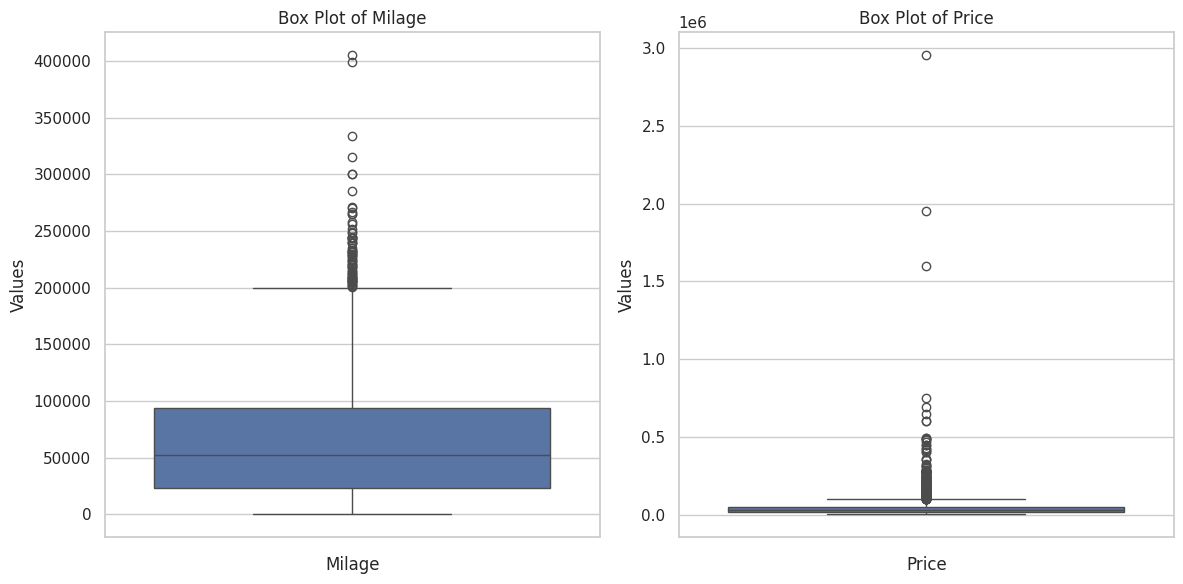

In [89]:
# Boxplots for numeric variables
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['milage'])
plt.title('Box Plot of Milage')
plt.xlabel('Milage')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

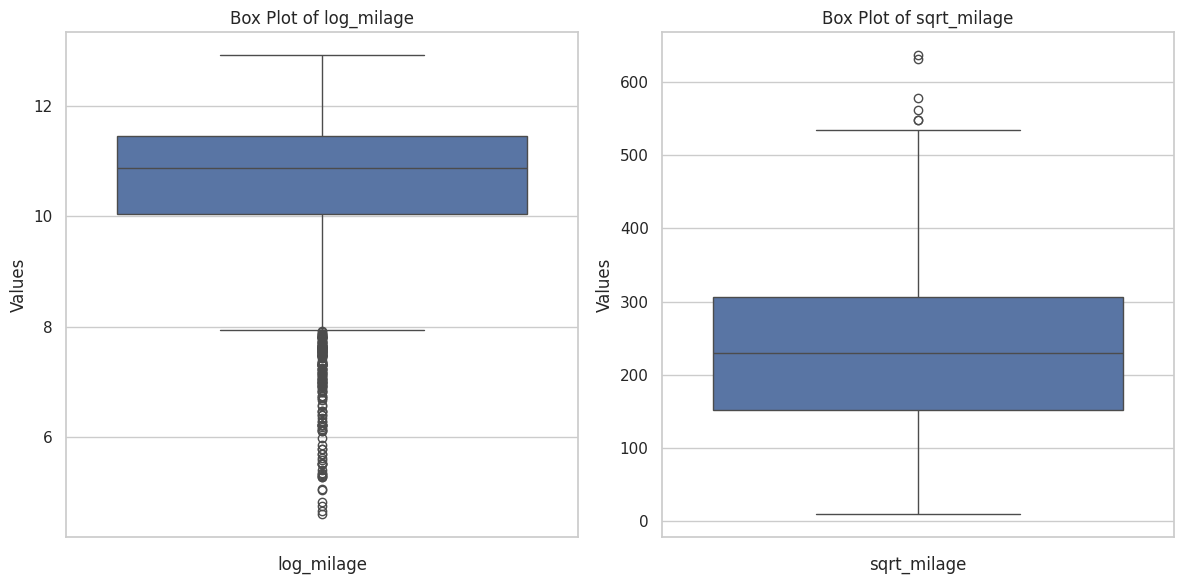

In [90]:
# Compare Log transformation and square root transformation for variable milage
df['log_milage'] = np.log(df['milage'] + 1)
df['sqrt_milage'] = np.sqrt(df['milage'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['log_milage'])
plt.title('Box Plot of log_milage')
plt.xlabel('log_milage')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['sqrt_milage'])
plt.title('Box Plot of sqrt_milage')
plt.xlabel('sqrt_milage')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

#sqrt is better

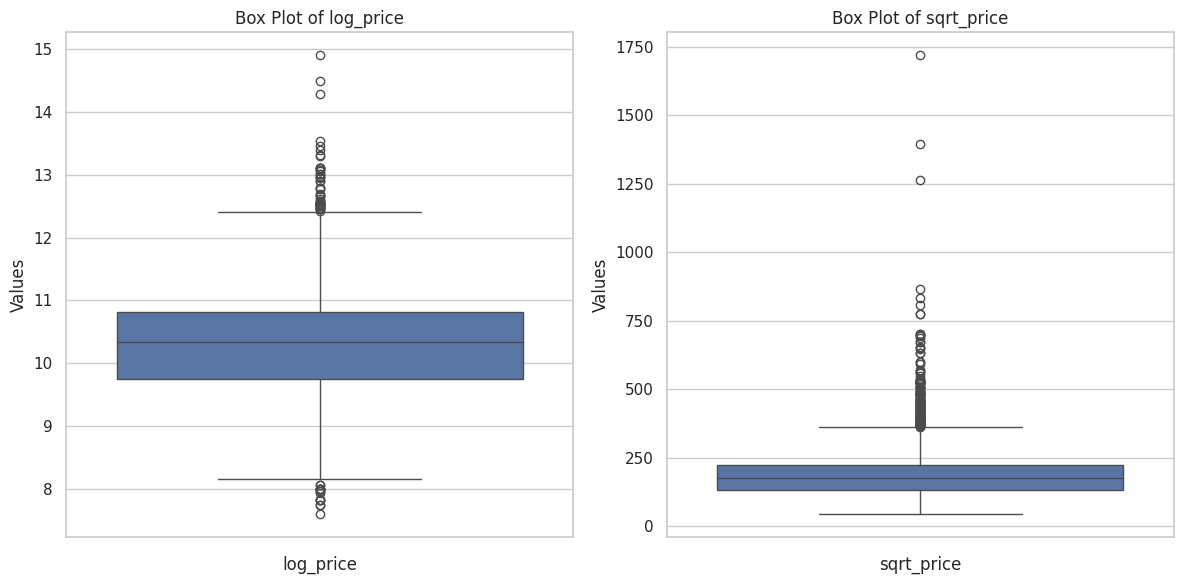

In [91]:
# Compare Log transformation and square root transformation for varibale price
df['log_price'] = np.log(df['price'] + 1)
df['sqrt_price'] = np.sqrt(df['price'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['log_price'])
plt.title('Box Plot of log_price')
plt.xlabel('log_price')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['sqrt_price'])
plt.title('Box Plot of sqrt_price')
plt.xlabel('sqrt_price')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

# log is better

In [92]:
df = df.drop(columns=['log_milage', 'sqrt_price','milage', 'price'])
df.head()

,brand,model_year,fuel_type,accident,clean_title,sqrt_milage,log_price
0,Ford,2013,E85 Flex Fuel,yes,yes,225.831796,9.239996
1,Hyundai,2021,Gasoline,yes,yes,186.392060,10.545499
2,Lexus,2022,Gasoline,no,yes,149.572725,10.907771
3,INFINITI,2015,Hybrid,no,yes,298.161030,9.648660
4,Audi,2021,Gasoline,no,yes,99.171569,10.463103


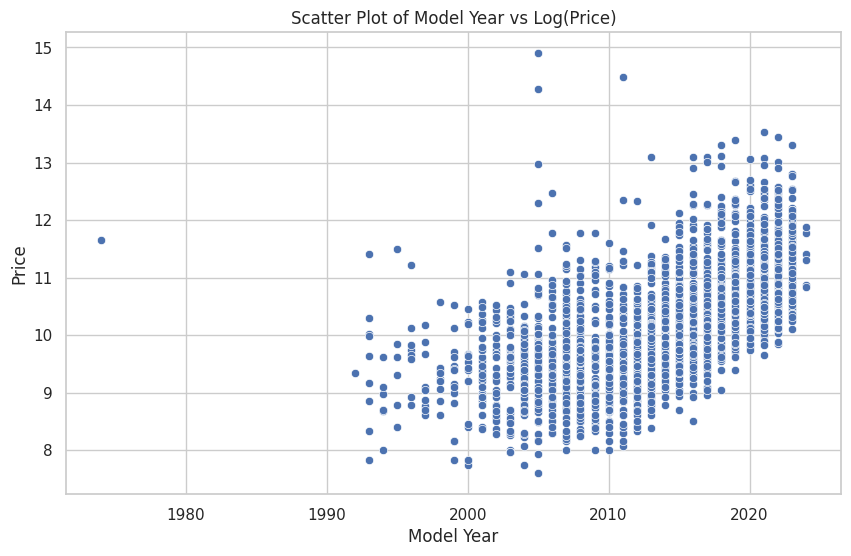

In [93]:
# Scatter Plot of Model Year vs Log_Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='log_price', data=df)
plt.title('Scatter Plot of Model Year vs Log(Price)')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

<Figure size 1500x4500 with 0 Axes>

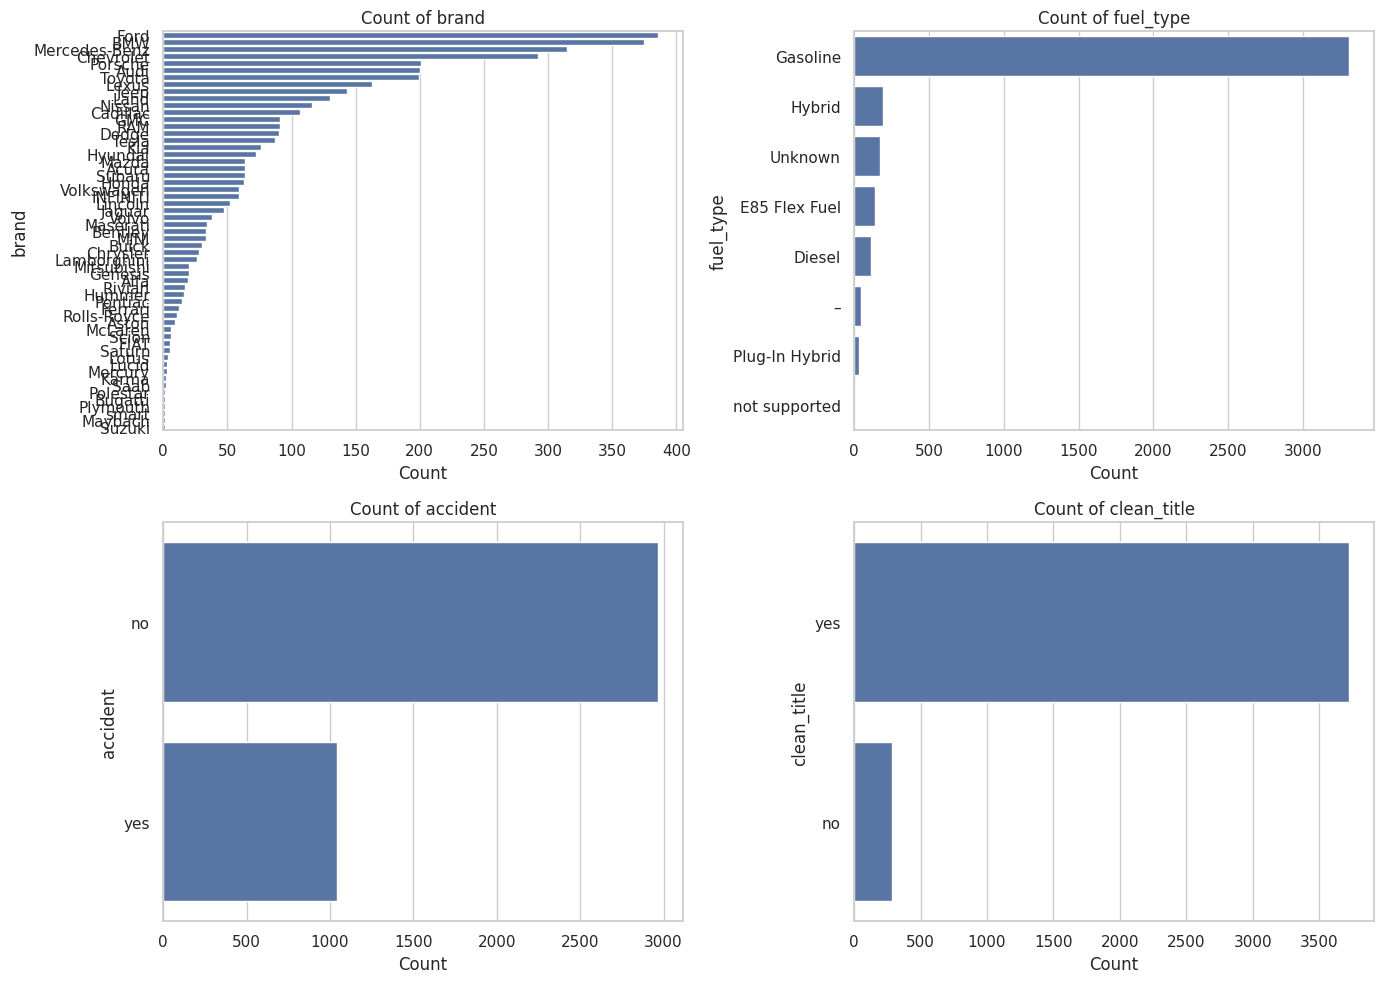

In [94]:
# Bar plots for categorical vars (varibles that do not have high cardinality)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 45))

categorical_cols = ['brand', 'fuel_type', 'accident', 'clean_title']
plots_per_figure = 4
num_figures = (len(categorical_cols) + plots_per_figure - 1) // plots_per_figure

for i in range(num_figures):
    plt.figure(figsize=(14, 10))
    for j in range(plots_per_figure):
        index = i * plots_per_figure + j
        if index < len(categorical_cols):
            plt.subplot(2, 2, j + 1)
            sns.countplot(y=categorical_cols[index], data=df, order=df[categorical_cols[index]].value_counts().index)
            plt.title(f'Count of {categorical_cols[index]}')
            plt.xlabel('Count')
            plt.ylabel(categorical_cols[index])
    plt.tight_layout()
    plt.show()


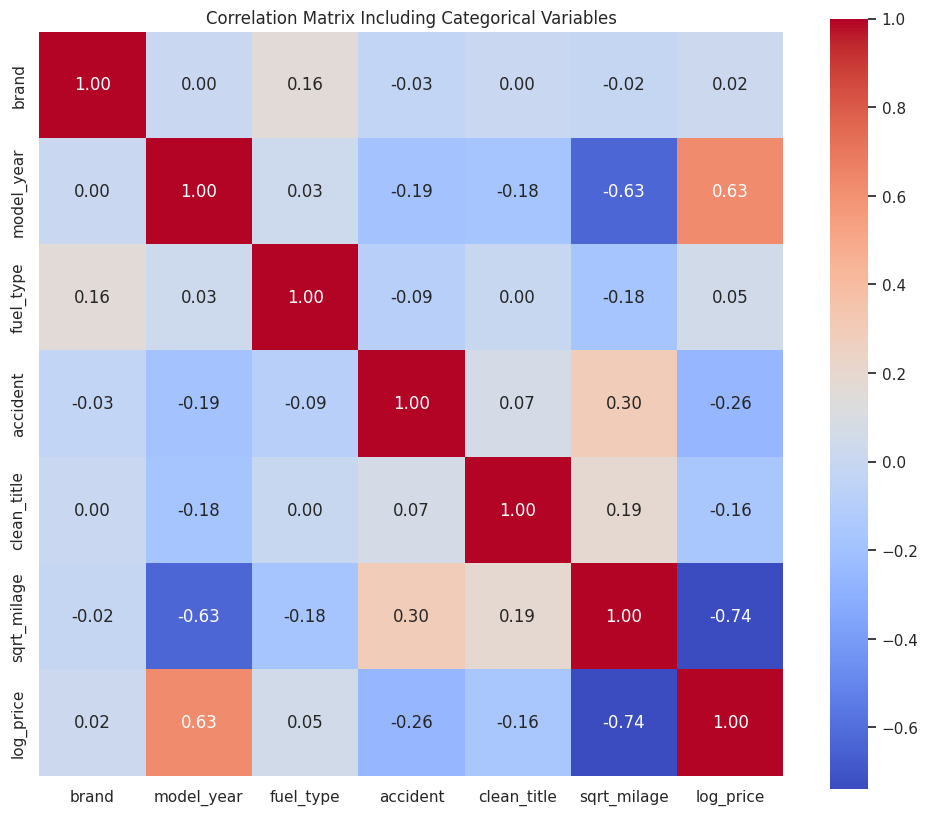

In [95]:
# Correlation Plot
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy()
for col in df.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])  # Convert each column to numeric

# Recalculate the correlation matrix with newly encoded columns
correlation_matrix = df1.corr()

# Plot the new correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Including Categorical Variables')
plt.show()

In [97]:
# Find highly correlated var
corr_matrix = df1.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
var = [column for column in upper.columns if any(upper[column] > 0.95)]
var

[]

In [100]:
X = df.drop(columns="log_price")
y = df["log_price"]
print(y)

0        9.239996
1       10.545499
2       10.907771
3        9.648660
4       10.463103
          ...    
4004    12.765548
4005    10.894904
4006    11.418604
4007    11.050890
4008    10.596660
Name: log_price, Length: 4009, dtype: float64
